In [17]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
from imagesc import imagesc

import retinotopic_mapping 
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

In [18]:
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'

In [19]:
# Access pipeline
map = dj.create_virtual_module('map.py', 'pipeline_map')

In [20]:
map.OptImageBar()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9508,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9579,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875


In [21]:
hor_ang = (map.OptImageBar() & 'animal_id=9508' & 'axis="horizontal"').fetch1('ang')
hpositiveInput = (hor_ang > 0)
hor_l = np.mod(hor_ang, 2*np.pi)
hor_l[(hor_l == 0) & hpositiveInput] = 2*np.pi
h_mn = np.percentile(hor_l, 1)
h_mx = np.percentile(hor_l, 99)
hor_l[hor_l>h_mx]=h_mx
hor_l[hor_l<h_mn]=h_mn

Text(0.5, 1.0, 'ang_after')

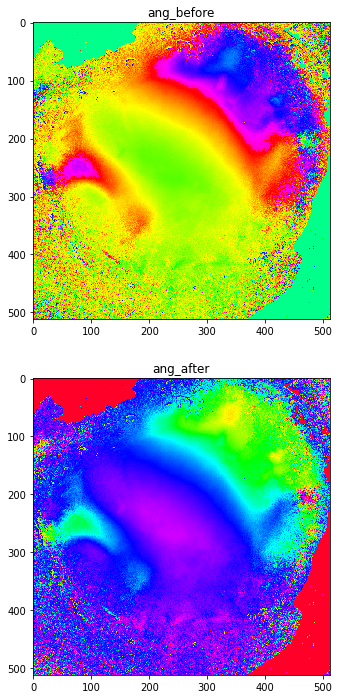

In [22]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(hor_ang, cmap='gist_rainbow', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(hor_l, cmap='gist_rainbow', interpolation='nearest')
plt.title('ang_after')

In [23]:
vert_ang = (map.OptImageBar() & 'animal_id=9508' & 'axis="vertical"').fetch1('ang')
vpositiveInput = (vert_ang > 0)
vert_l = np.mod(vert_ang, 2*np.pi)
vert_l[(vert_l == 0) & vpositiveInput] = 2*np.pi
v_mn = np.percentile(vert_l, 1)
v_mx = np.percentile(vert_l, 99)
vert_l[vert_l>v_mx]=v_mx
vert_l[vert_l<v_mn]=v_mn

Text(0.5, 1.0, 'ang_after')

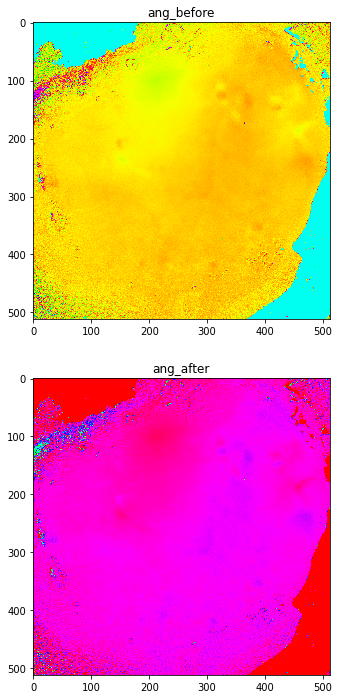

In [24]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(vert_ang, cmap='hsv', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(vert_l, cmap='hsv', interpolation='nearest')
plt.title('ang_after')

In [25]:
azi_amp, azi_ang, azi_vessels = (map.OptImageBar() & 'animal_id=9508' & 'axis="horizontal"').fetch1('amp', 'ang', 'vessels')
alt_amp, alt_ang, alt_vessels = (map.OptImageBar() & 'animal_id=9508' & 'axis="vertical"').fetch1('amp', 'ang', 'vessels')


In [26]:
params = {
          'phaseMapFilterSigma': 0.5,   # FLOAT, default = 1.0, recommended range: [0.0, 2.0]
          'signMapFilterSigma': 8.,     # FLOAT, default = 9.0, recommended range: [0.6, 10.0]
          'signMapThr': 0.4,            # FLOAT, default = 0.35, recommended range: [0.2, 0.5], allowed range: [0, 1)
          'eccMapFilterSigma': 15.0,    # FLOAT, default = 10.0, do not change
          'splitLocalMinCutStep': 5.,   # FLOAT, default = 5.0, recommend range: [0.5, 15.0]
          'closeIter': 3,               # INT, default = 3, do not change
          'openIter': 3,                # INT, default = 3, do not change
          'dilationIter': 15,           # INT, default = 15, do not change
          'borderWidth': 1,             # INT, default = 1, do not change
          'smallPatchThr': 100,         # INT, default = 100, do not change
          'visualSpacePixelSize': 0.5,  # FLOAT, default = 0.5, do not change
          'visualSpaceCloseIter': 15,   # INT, default = 15, do not change
          'splitOverlapThr': 1.1,       # FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0
          'mergeOverlapThr': 0.1        # FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0
          }

In [27]:
trial = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='9508',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

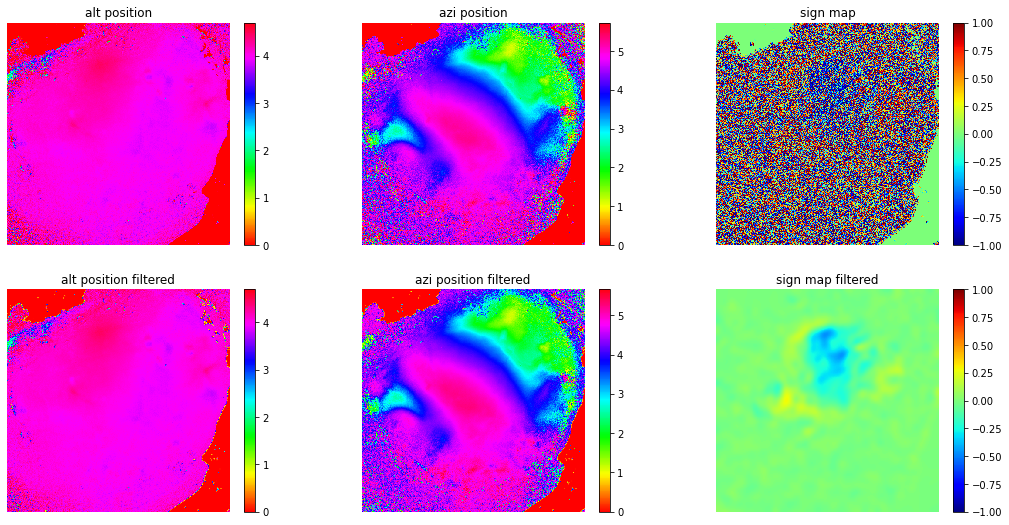

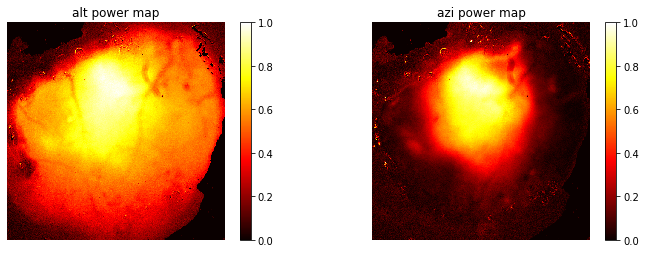

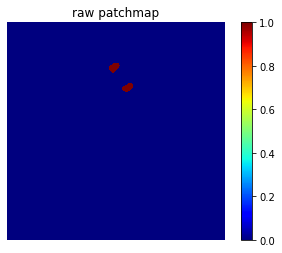

UnboundLocalError: local variable 'currPatch' referenced before assignment

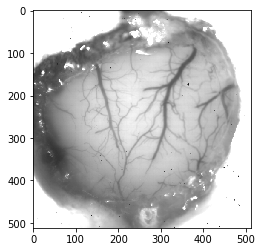

In [28]:
trial.processTrial(isPlot=True)

In [29]:
# default values
paramsd = {
          'phaseMapFilterSigma': 1, 
          'signMapFilterSigma': 9,
          'signMapThr': 0.35,
          'eccMapFilterSigma': 10.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [30]:
triald = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='9508',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=paramsd)

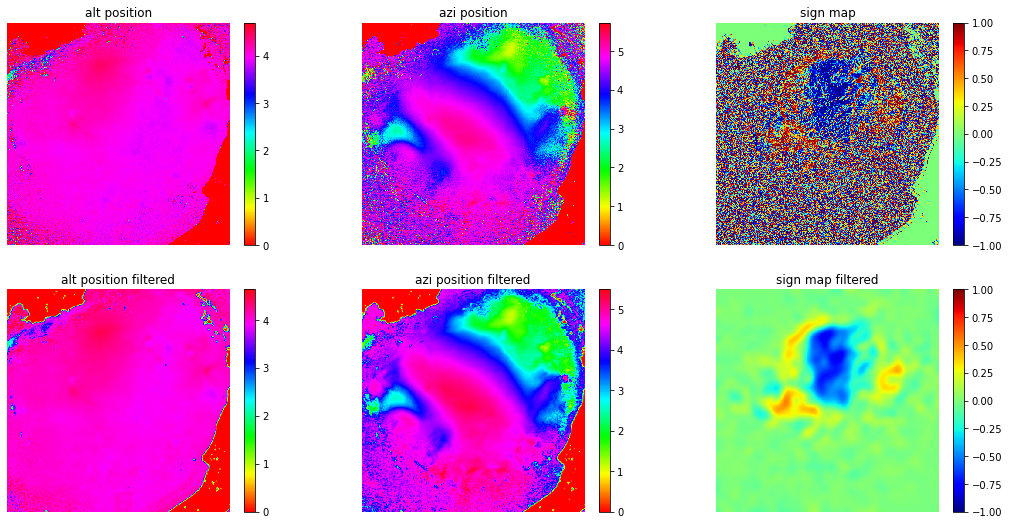

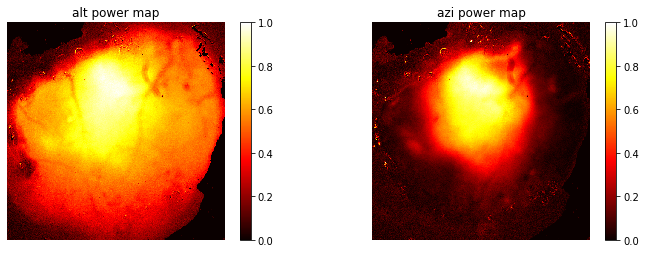

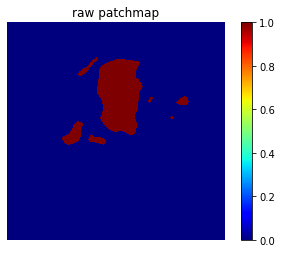

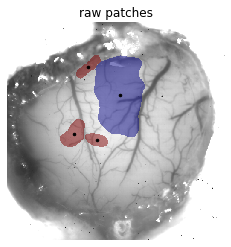

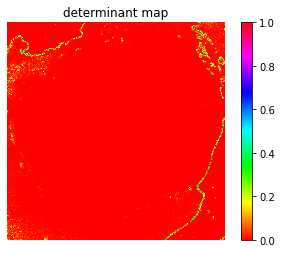

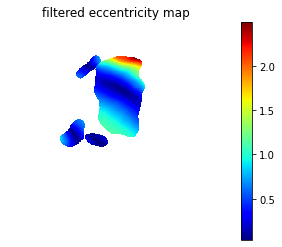

patch01AU=3.25 AS=1.3648865 ratio=0.4199650837824895
patch02AU=1.5 AS=0.22502705 ratio=0.15001803636550903
patch03AU=0.75 AS=0.14656647 ratio=0.19542195399602255
patch04AU=0.75 AS=0.0591844 ratio=0.07891253133614858


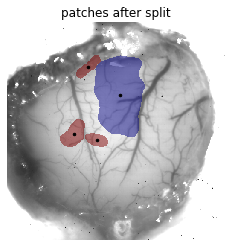

merge iteration: 1


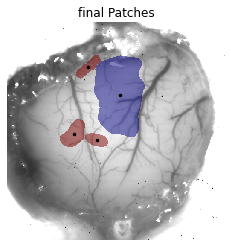

In [31]:
triald.processTrial(isPlot=True)